**Upload File**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving jabodetabek_house_price.csv to jabodetabek_house_price.csv


## **Import Library**

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## **Load Dataset**

In [5]:
data = pd.read_csv('jabodetabek_house_price.csv')

In [6]:
# --- EDA: Gambaran Awal Dataset ---
print("Shape data:", data.shape)
print("\nTipe Data:")
print(data.dtypes)

print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())

print("\nStatistik Deskriptif:")
print(data.describe().T)

Shape data: (3553, 27)

Tipe Data:
url                      object
price_in_rp             float64
title                    object
address                  object
district                 object
city                     object
lat                     float64
long                    float64
facilities               object
property_type            object
ads_id                   object
bedrooms                float64
bathrooms               float64
land_size_m2            float64
building_size_m2        float64
carports                float64
certificate              object
electricity              object
maid_bedrooms           float64
maid_bathrooms          float64
floors                  float64
building_age            float64
year_built              float64
property_condition       object
building_orientation     object
garages                 float64
furnishing               object
dtype: object

Jumlah Missing Values per Kolom:
url                        0
price_in_rp             

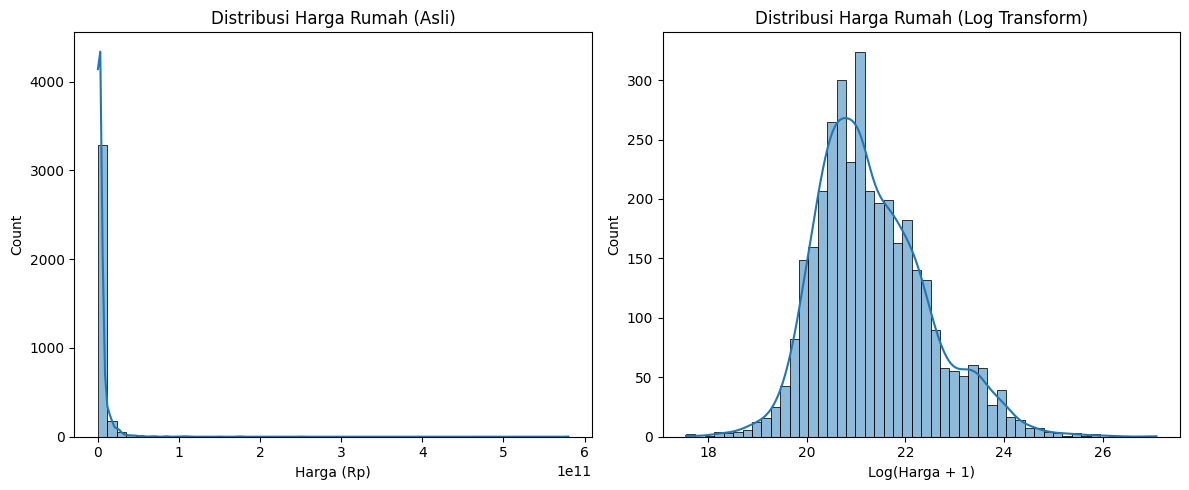

In [7]:
# --- Distribusi Harga Rumah (Asli dan Log) ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['price_in_rp'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah (Asli)')
plt.xlabel('Harga (Rp)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['price_in_rp']), bins=50, kde=True)
plt.title('Distribusi Harga Rumah (Log Transform)')
plt.xlabel('Log(Harga + 1)')

plt.tight_layout()
plt.show()

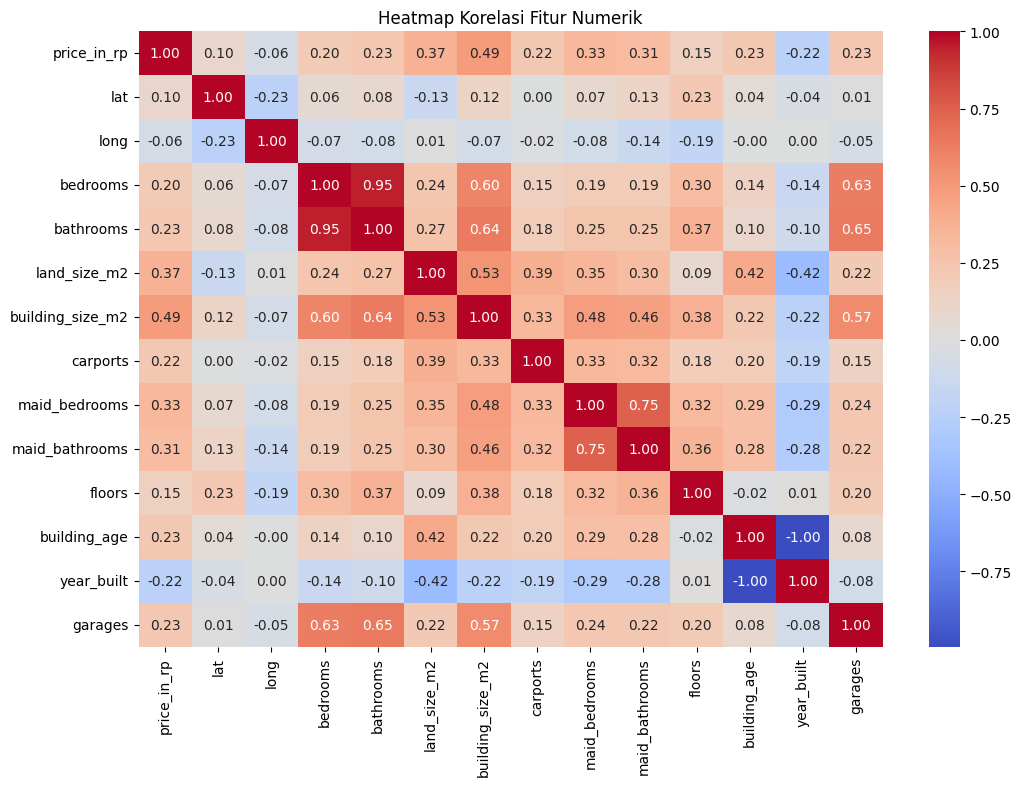

In [8]:
# --- Korelasi Antar Fitur Numerik ---
plt.figure(figsize=(12, 8))
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## **Pisahkan Fitur dan Target**

In [10]:
X_raw = data.drop(['price_in_rp', 'facilities'], axis=1, errors='ignore')
y_raw = data['price_in_rp']

## **Preprocessing Data**

In [11]:
X_raw = X_raw.select_dtypes(include=['int64', 'float64']).fillna(0)  # Ambil fitur numerik saja

## **Split Data Training & Testing**

In [12]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

## **Training Model**

In [13]:
rf_simple = RandomForestRegressor(random_state=42)
rf_simple.fit(X_train_raw, y_train_raw)
y_pred_raw = rf_simple.predict(X_test_raw)

## **Evaluasi Model**

In [14]:
print("MAE:", mean_absolute_error(y_test_raw, y_pred_raw))
print("MSE:", mean_squared_error(y_test_raw, y_pred_raw))
print("RMSE:", np.sqrt(mean_squared_error(y_test_raw, y_pred_raw)))
print("R2 Score:", r2_score(y_test_raw, y_pred_raw))

MAE: 1589833710.9867003
MSE: 4.2082716319241585e+19
RMSE: 6487119261.98691
R2 Score: 0.42304203397639384


## **Feature Importance**

In [15]:
importances = rf_simple.feature_importances_
indices = np.argsort(importances)[::-1]

In [16]:
feature_names_raw = X_raw.columns.tolist()

In [17]:
print("\nFeature Importance (Eksperimen 1):")
for i in range(len(importances)):
    print(f"{feature_names_raw[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance (Eksperimen 1):
building_size_m2: 0.3582
land_size_m2: 0.2530
bedrooms: 0.0785
year_built: 0.0607
lat: 0.0433
maid_bedrooms: 0.0402
maid_bathrooms: 0.0355
long: 0.0352
garages: 0.0259
bathrooms: 0.0220
building_age: 0.0212
carports: 0.0192
floors: 0.0071


## **Visualisasi Feature Importance**

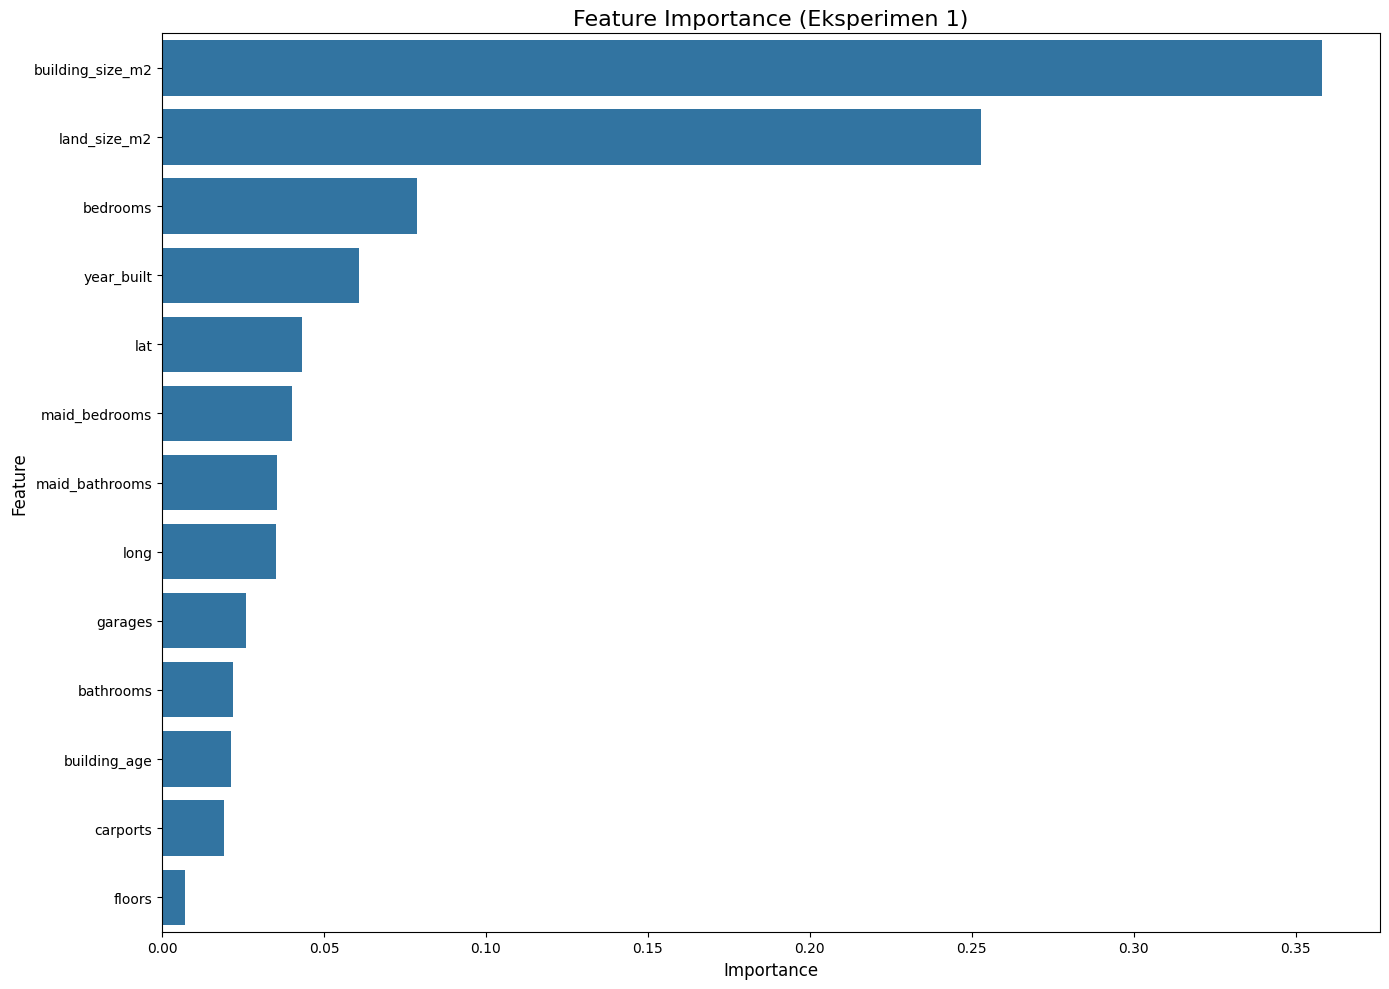

In [18]:
plt.figure(figsize=(14, 10))
sns.barplot(x=importances[indices], y=np.array(feature_names_raw)[indices], orient='h')
plt.title('Feature Importance (Eksperimen 1)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Kesimpulan 1**

Berdasarkan hasil eksperimen, model Random Forest mampu memprediksi harga rumah dengan tingkat akurasi sedang (R² sebesar 42%), yang menunjukkan bahwa sekitar 42% variasi harga dapat dijelaskan oleh fitur-fitur yang digunakan. Meskipun demikian, nilai MAE dan RMSE yang masih tinggi menunjukkan bahwa terdapat kesalahan prediksi yang cukup besar. Fitur paling berpengaruh dalam menentukan harga rumah adalah luas bangunan dan luas tanah, sementara fitur seperti jumlah lantai dan carport memiliki pengaruh yang kecil. Secara umum, model ini sudah dapat menangkap pola dasar dari data, namun masih perlu ditingkatkan melalui penambahan fitur yang lebih relevan dan teknik pemrosesan data yang lebih baik.